# Cargar datos y librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Basic
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statistics import mode
import os
import glob
import random
import cv2

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle

import cv2
# Features 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from skimage import feature
# Metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score #c alculate accuracy
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
# Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#Save model
import joblib  

In [ ]:
def extract_data(path, file_type="*.jpg",Resize=False):
    
    list_people = os.listdir(path)


    type_file = "*.jpg"

    cont_train = 0
    cont_train2 = 0

    for k in list_people:

        path_image = path + "/" + k
        list_jpg = glob.glob(path_image + os.sep + type_file)

        cont_train += len(list_jpg)


    print("El número de muestras para el entrenamiento: ",cont_train)

    #x,y = (cv2.imread(list_jpg[0], cv2.IMREAD_GRAYSCALE)).shape

    #train_data = np.zeros((cont_train,x,y))
    train_data = np.zeros((cont_train,192,168))
    train_data = train_data.astype('float32')

    y_train = np.zeros(cont_train)
    y_train = y_train.astype('int8')

    count = 0
    for i in list_people:

        #print(i)

        path_image = path + "/" + i

        list_jpg = glob.glob(path_image + os.sep + type_file)

        for j in list_jpg:


            image = cv2.imread(j, cv2.IMREAD_GRAYSCALE)
            if (Resize == True):
                #image = cv2.resize(image,(x,y))
                image = cv2.resize(image,(168,192))
                
            train_data[cont_train2] += image 

            y_train[cont_train2] = count
            #print(y_train[cont2])
            cont_train2 += 1
        count += 1
            
    return train_data, y_train


In [ ]:
path_train = "/content/drive/MyDrive/Colab Notebooks/Base-De-Datos/datasetYale1/train"
path_test = "/content/drive/MyDrive/Colab Notebooks/Base-De-Datos/datasetYale1/test"

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Base-De-Datos/datasetYale1/train"

list_people = os.listdir(path)

subcadena = "yaleB" #la subcadena que queremos localizar
type_file = "*.jpg"

cont = 0
cont2 = 0

for k in list_people:
    
    path_image = path + "/" + k
    list_jpg = glob.glob(path_image + os.sep + type_file)
    
    cont += len(list_jpg)
    
print("El número de muestras: ",cont)

train_data = np.zeros((cont,192,168))
train_data = train_data.astype('float32')

y_train = np.zeros(cont)
y_train = y_train.astype('int8')


for i in list_people:
    
    #print(i)
    
    path_image = path + "/" + i
    
    list_jpg = glob.glob(path_image + os.sep + type_file)
    
    for j in list_jpg:
        
        image = cv2.imread(j, cv2.IMREAD_GRAYSCALE)
        
        train_data[cont2] += image 

        cadena = j
        posicion = cadena.find(subcadena)

        y_train[cont2] = 10* int(cadena[posicion+5]) + int(cadena[posicion+6])
        #print(y_train[cont2])
        cont2 += 1

#print(y_train)

El número de muestras:  1844


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Base-De-Datos/datasetYale1/test"

list_people = os.listdir(path)

subcadena = "yaleB" #la subcadena que queremos localizar
type_file = "*.jpg"

cont = 0
cont2 = 0

for k in list_people:
    
    path_image = path + "/" + k
    list_jpg = glob.glob(path_image + os.sep + type_file)
    
    cont += len(list_jpg)
    
print("El número de muestras: ",cont)

test_data = np.zeros((cont,192,168))
test_data = test_data.astype('float32')

y_test = np.zeros(cont)
y_test = y_test.astype('int8')


for i in list_people:
    
    #print(i)
    
    path_image = path + "/" + i
    
    list_jpg = glob.glob(path_image + os.sep + type_file)
    
    for j in list_jpg:
        
        image = cv2.imread(j, cv2.IMREAD_GRAYSCALE)
        
        test_data[cont2] += image 

        cadena = j
        posicion = cadena.find(subcadena)

        y_test[cont2] = 10* int(cadena[posicion+5]) + int(cadena[posicion+6])
        #print(y_train[cont2])
        cont2 += 1

#print(y_train)

El número de muestras:  580


In [ ]:
#train_data, y_train = extract_data(path_train,"*.jpg",True)

In [ ]:
#test_data, y_test = extract_data(path_test,"*.jpg",True)

In [ ]:
#import sys
#np.set_printoptions(threshold=sys.maxsize)
#y_test

# Separar datos en train y test

In [ ]:
nsamples, nx, ny = train_data.shape

train_data = train_data.reshape((nsamples,nx*ny))

X_sparse = coo_matrix(train_data)

train_data, X_sparse, y_train = shuffle(train_data, X_sparse,y_train, random_state=0)

train_data = train_data.reshape((nsamples,nx,ny))

In [ ]:
nsamples, nx, ny = test_data.shape

test_data = test_data.reshape((nsamples,nx*ny))

X_sparse = coo_matrix(test_data)

test_data, X_sparse, y_test = shuffle(test_data, X_sparse,y_test, random_state=0)

test_data = test_data.reshape((nsamples,nx,ny))

In [ ]:
train_data = train_data.astype("uint8")
nsamples1, nx1, ny1 = train_data.shape
train_data = train_data.reshape((nsamples1,nx1*ny1))
train_data = train_data/255

test_data = test_data.astype("uint8")
nsamples, nx, ny = test_data.shape
test_data = test_data.reshape((nsamples,nx*ny))
test_data = test_data/255

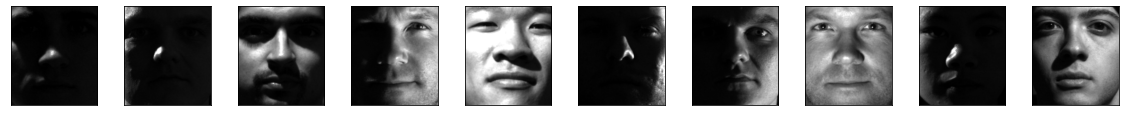

In [ ]:
# Para imprimir algunas de las imagenes de entrenamiento

view = train_data
view = view.reshape((nsamples1,nx1,ny1))
n = 10  # cantidad de imagenes

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(view[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#cv2.imwrite('Imagen_gris.png',view[0])
plt.show()

# LBP


## Extracción de caracteristicas

In [ ]:
# https://github.com/AsoStrife/Computer-Vision-Project

def blockshaped(arr, nrows, ncols):

    h, w = arr.shape
    return (arr.reshape(h//nrows, nrows, -1, ncols)
            .swapaxes(1,2)
            .reshape(-1, nrows, ncols))
def getHistogram(imgArray):
    hist, bin_edges = np.histogram(imgArray, density=True)
    return hist

In [ ]:
# tamaño de train y test
cont_train = train_data.shape[0]
cont_test = test_data.shape[0]
print(cont_test)

580


In [ ]:
train_data_LBP = train_data.reshape((cont_train,nx,ny))
lbp_feactures  = np.zeros((cont_train,nx,ny))

eps = 1e-7
radius = 1
n_points = 8 * radius

lbp_hist = np.zeros((cont_train,1440))

for i in range(0,cont_train): 
    lbp = feature.local_binary_pattern(train_data_LBP[i], n_points, radius)
    lbp_feactures[i] +=  lbp
    
    shaped = blockshaped(lbp_feactures[i], 16, 14)
    x = []
    xBlocks = []
    for s in shaped:
        xBlocks.append(getHistogram(s))
    # Concatenate the various histogram, the resulting histogram is append into feature vector
    x.append(np.concatenate(xBlocks))
    
    lbp_hist[i] += x[0]

In [ ]:
test_data_LBP = test_data.reshape((cont_test,nx,ny))
lbp_feactures_test  = np.zeros((cont_test,nx,ny))


lbp_hist_test = np.zeros((cont_test,1440))

for i in range(0,cont_test): 
    lbp = feature.local_binary_pattern(test_data_LBP[i], n_points, radius)
    lbp_feactures_test[i] +=  lbp
    
    shaped = blockshaped(lbp_feactures_test[i], 16, 14)
    x = []
    xBlocks = []
    for s in shaped:
        xBlocks.append(getHistogram(s))
    # Concatenate the various histogram, the resulting histogram is append into feature vector
    x.append(np.concatenate(xBlocks))
    
    lbp_hist_test[i] += x[0]
    

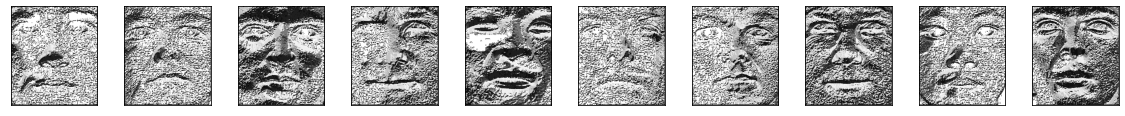

In [ ]:
view = lbp_feactures
n = 10  # cantidad de imagenes

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(view[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## SMV

In [ ]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf_lbp_svm = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf_lbp_svm = clf_lbp_svm.fit(lbp_hist,y_train )

print("El mejor conjunto de caracteriticas es: ")
print(clf_lbp_svm.best_estimator_)

El mejor conjunto de caracteriticas es: 
SVC(C=50000.0, class_weight='balanced', gamma=0.005)


In [ ]:
y_pred_lbp_svm = clf_lbp_svm.predict(lbp_hist_test)
report = classification_report(y_test, y_pred_lbp_svm,digits=4,output_dict=True)
print(classification_report(y_test, y_pred_lbp_svm,digits=4))

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        15
           2     1.0000    0.9333    0.9655        15
           3     0.9375    1.0000    0.9677        15
           4     1.0000    1.0000    1.0000        15
           5     1.0000    0.9333    0.9655        15
           6     1.0000    1.0000    1.0000        15
           7     1.0000    1.0000    1.0000        15
           8     0.8824    1.0000    0.9375        15
           9     1.0000    1.0000    1.0000        15
          10     1.0000    0.9333    0.9655        15
          11     1.0000    1.0000    1.0000        18
          12     1.0000    1.0000    1.0000        22
          13     0.9375    1.0000    0.9677        15
          15     1.0000    0.8667    0.9286        15
          16     1.0000    1.0000    1.0000        15
          17     1.0000    1.0000    1.0000        15
          18     1.0000    1.0000    1.0000        15
          19     1.0000    

In [ ]:
import pandas
df = pandas.DataFrame(report).transpose()
#df.to_excel("svmLBP.xlsx")  

In [ ]:
# 
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, y_pred_lbp_svm))


0.977101855647775


In [ ]:
def specificity(y_true,y_pred):
        cm=confusion_matrix(y_true, y_pred)
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Specificity = TN/(TN+FP)    
        return np.mean(Specificity)
        
print(specificity(y_test, y_pred_lbp_svm))

0.9993945039590124


## KNN

In [ ]:
clf_lbp_Kn_3 = KNeighborsClassifier(n_neighbors=7)

In [ ]:
clf_lbp_Kn_3 = clf_lbp_Kn_3.fit(lbp_hist,y_train)

In [ ]:
y_pred_lbp_knn = clf_lbp_Kn_3.predict(lbp_hist_test)
report = classification_report(y_test, y_pred_lbp_knn,digits=4,output_dict=True)
print(classification_report(y_test, y_pred_lbp_knn,digits=4))
df = pandas.DataFrame(report).transpose()
#df.to_excel("knnLBP.xlsx")  

              precision    recall  f1-score   support

           1     0.4516    0.9333    0.6087        15
           2     0.8750    0.9333    0.9032        15
           3     0.8000    0.8000    0.8000        15
           4     0.6250    1.0000    0.7692        15
           5     0.9286    0.8667    0.8966        15
           6     0.5000    1.0000    0.6667        15
           7     0.8333    1.0000    0.9091        15
           8     1.0000    1.0000    1.0000        15
           9     0.9375    1.0000    0.9677        15
          10     0.9286    0.8667    0.8966        15
          11     0.7727    0.9444    0.8500        18
          12     1.0000    0.9545    0.9767        22
          13     1.0000    0.6000    0.7500        15
          15     0.6875    0.7333    0.7097        15
          16     0.8182    0.6000    0.6923        15
          17     0.9231    0.8000    0.8571        15
          18     1.0000    0.8000    0.8889        15
          19     0.8125    

In [ ]:

print(matthews_corrcoef(y_test, y_pred_lbp_knn))

0.8470953119230031


In [ ]:
print(specificity(y_test, y_pred_lbp_knn))                 

0.9959465910390564


## Gauss

In [ ]:
clf_lbp_Gauss = GaussianNB()

In [ ]:
clf_lbp_Gauss = clf_lbp_Gauss.fit(lbp_hist,y_train)

In [ ]:
y_pred_lbp_gaus = clf_lbp_Gauss.predict(lbp_hist_test)

print(classification_report(y_test, y_pred_lbp_gaus,digits=4))
report = classification_report(y_test, y_pred_lbp_gaus,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
#df.to_excel("gaussLBP.xlsx")  

              precision    recall  f1-score   support

           1     0.9375    1.0000    0.9677        15
           2     1.0000    0.9333    0.9655        15
           3     0.7895    1.0000    0.8824        15
           4     0.8333    1.0000    0.9091        15
           5     1.0000    0.8667    0.9286        15
           6     0.8750    0.9333    0.9032        15
           7     1.0000    0.9333    0.9655        15
           8     1.0000    0.9333    0.9655        15
           9     0.8000    0.8000    0.8000        15
          10     0.6667    0.8000    0.7273        15
          11     1.0000    0.8333    0.9091        18
          12     1.0000    0.9545    0.9767        22
          13     0.9333    0.9333    0.9333        15
          15     1.0000    0.8000    0.8889        15
          16     0.9000    0.6000    0.7200        15
          17     0.9333    0.9333    0.9333        15
          18     1.0000    0.8667    0.9286        15
          19     0.8125    

In [ ]:
print(matthews_corrcoef(y_test, y_pred_lbp_gaus))

0.8469209697417149


In [ ]:
print(specificity(y_test, y_pred_lbp_gaus)) 

0.995947834187238


# PCA 

## Extracción de caracteristicas 

In [ ]:
n_components = 150

print("Extrayendo %d eigenfaces de %d caras"
      % (n_components, train_data.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(train_data)


eigenfaces = pca.components_.reshape((n_components, nx1, ny1))

print("Projecting the input data on the eigenfaces orthonormal basis")

train_data_pca = pca.transform(train_data)
test_data_pca = pca.transform(test_data)

Extrayendo 150 eigenfaces de 1844 caras
Projecting the input data on the eigenfaces orthonormal basis


## SVM


In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

clf_pca_svm = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf_pca_svm = clf_pca_svm.fit(train_data_pca,y_train )

print("Best estimator found by grid search:")
print(clf_pca_svm.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [ ]:
y_pred = clf_pca_svm.predict(test_data_pca)

print(classification_report(y_test, y_pred,digits=4))
report = classification_report(y_test, y_pred,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
#df.to_excel("svmPCA.xlsx")  



              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        15
           2     1.0000    0.9333    0.9655        15
           3     0.9375    1.0000    0.9677        15
           4     1.0000    0.9333    0.9655        15
           5     0.9375    1.0000    0.9677        15
           6     0.8824    1.0000    0.9375        15
           7     0.9375    1.0000    0.9677        15
           8     1.0000    0.9333    0.9655        15
           9     0.9375    1.0000    0.9677        15
          10     0.9333    0.9333    0.9333        15
          11     1.0000    0.9444    0.9714        18
          12     1.0000    1.0000    1.0000        22
          13     1.0000    0.9333    0.9655        15
          15     1.0000    0.9333    0.9655        15
          16     0.9286    0.8667    0.8966        15
          17     1.0000    0.9333    0.9655        15
          18     1.0000    1.0000    1.0000        15
          19     1.0000    

In [ ]:
print(matthews_corrcoef(y_test, y_pred))

0.9558471054469707


In [ ]:
print(specificity(y_test, y_pred)) 

0.9988355845365625


## knn

In [ ]:
clf_PCA_Knn_3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf_lbp_Kn_3 = clf_PCA_Knn_3.fit(train_data_pca,y_train)

In [ ]:
y_pred = clf_lbp_Kn_3.predict(test_data_pca)

print(classification_report(y_test, y_pred,digits=4))
report = classification_report(y_test, y_pred,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("knnPCA.xlsx")  


              precision    recall  f1-score   support

           1     0.8333    1.0000    0.9091        15
           2     0.8750    0.9333    0.9032        15
           3     0.7222    0.8667    0.7879        15
           4     0.7895    1.0000    0.8824        15
           5     0.7778    0.9333    0.8485        15
           6     1.0000    0.9333    0.9655        15
           7     0.9333    0.9333    0.9333        15
           8     0.7778    0.9333    0.8485        15
           9     0.9375    1.0000    0.9677        15
          10     0.9286    0.8667    0.8966        15
          11     1.0000    0.9444    0.9714        18
          12     1.0000    0.9545    0.9767        22
          13     0.9333    0.9333    0.9333        15
          15     1.0000    0.9333    0.9655        15
          16     1.0000    0.8667    0.9286        15
          17     0.9333    0.9333    0.9333        15
          18     1.0000    0.8667    0.9286        15
          19     1.0000    

In [ ]:
print(matthews_corrcoef(y_test, y_pred))

0.9222598675779197


In [ ]:
print(specificity(y_test, y_pred)) 

0.9979506287843501


## Gauss

In [ ]:
clf_PCA_Gauss = GaussianNB()

In [ ]:
clf_lbp_Gauss = clf_PCA_Gauss.fit(train_data_pca,y_train)

In [ ]:
y_pred = clf_lbp_Gauss.predict(test_data_pca)

print(classification_report(y_test, y_pred,digits=4))
report = classification_report(y_test, y_pred,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("gaussPCA.xlsx")  


              precision    recall  f1-score   support

           1     0.8750    0.9333    0.9032        15
           2     1.0000    0.8667    0.9286        15
           3     1.0000    0.7333    0.8462        15
           4     1.0000    0.8000    0.8889        15
           5     0.9286    0.8667    0.8966        15
           6     0.8333    1.0000    0.9091        15
           7     1.0000    0.7333    0.8462        15
           8     0.9167    0.7333    0.8148        15
           9     1.0000    0.9333    0.9655        15
          10     0.7647    0.8667    0.8125        15
          11     1.0000    0.8333    0.9091        18
          12     1.0000    0.9545    0.9767        22
          13     0.5357    1.0000    0.6977        15
          15     1.0000    0.8000    0.8889        15
          16     1.0000    0.7333    0.8462        15
          17     0.9333    0.9333    0.9333        15
          18     1.0000    0.7333    0.8462        15
          19     1.0000    

In [ ]:
print(matthews_corrcoef(y_test, y_pred))

0.8732972780292567


In [ ]:
print(specificity(y_test, y_pred)) 

0.9966464834653006


# LDA

## Extracción de caracteristicas 

In [ ]:
lda = LDA(n_components=37)
X_train = lda.fit_transform(train_data, y_train)
train_data_LDA = lda.transform(train_data)
test_data_LDA = lda.transform(test_data)

## SVM

In [ ]:
clf_lda_svm = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf_lda_svm = clf_lda_svm.fit(train_data_LDA,y_train )

print("Best estimator found by grid search:")
print(clf_lda_svm.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.001)


In [ ]:
y_pred_lda_svm = clf_lda_svm.predict(test_data_LDA)

print(classification_report(y_test, y_pred_lda_svm,digits=4))
report = classification_report(y_test, y_pred_lda_svm,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("svmLDA.xlsx")  

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        15
           2     0.8235    0.9333    0.8750        15
           3     0.8750    0.9333    0.9032        15
           4     0.9375    1.0000    0.9677        15
           5     1.0000    0.9333    0.9655        15
           6     1.0000    1.0000    1.0000        15
           7     1.0000    1.0000    1.0000        15
           8     0.9286    0.8667    0.8966        15
           9     1.0000    0.9333    0.9655        15
          10     0.6667    0.9333    0.7778        15
          11     1.0000    1.0000    1.0000        18
          12     1.0000    1.0000    1.0000        22
          13     1.0000    0.6667    0.8000        15
          15     1.0000    0.9333    0.9655        15
          16     1.0000    0.8667    0.9286        15
          17     1.0000    0.9333    0.9655        15
          18     1.0000    1.0000    1.0000        15
          19     1.0000    

In [ ]:
print(matthews_corrcoef(y_test, y_pred_lda_svm))

0.9135512695258977


In [ ]:
print(specificity(y_test, y_pred_lda_svm)) 

0.9977177456916626


## knn

In [ ]:
clf_LDA_Knn_3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf_LDA_Knn_3 = clf_PCA_Knn_3.fit(train_data_LDA,y_train)

In [ ]:
y_pred = clf_LDA_Knn_3.predict(test_data_LDA)

print(classification_report(y_test, y_pred,digits=4))
report = classification_report(y_test, y_pred,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("knnLDA.xlsx")  

              precision    recall  f1-score   support

           1     0.9375    1.0000    0.9677        15
           2     0.6818    1.0000    0.8108        15
           3     0.7895    1.0000    0.8824        15
           4     0.9375    1.0000    0.9677        15
           5     1.0000    1.0000    1.0000        15
           6     1.0000    1.0000    1.0000        15
           7     1.0000    1.0000    1.0000        15
           8     0.9286    0.8667    0.8966        15
           9     0.8824    1.0000    0.9375        15
          10     0.9333    0.9333    0.9333        15
          11     1.0000    1.0000    1.0000        18
          12     1.0000    1.0000    1.0000        22
          13     0.7778    0.9333    0.8485        15
          15     1.0000    0.9333    0.9655        15
          16     1.0000    0.9333    0.9655        15
          17     1.0000    1.0000    1.0000        15
          18     1.0000    1.0000    1.0000        15
          19     1.0000    

In [ ]:
print(matthews_corrcoef(y_test, y_pred))

0.9576559900793538


In [ ]:
print(specificity(y_test, y_pred)) 

0.9988821611551003


## Gauss

In [ ]:
clf_LDA_Gauss = GaussianNB()

In [ ]:
clf_LDA_Gauss = clf_LDA_Gauss.fit(train_data_LDA,y_train)

In [ ]:
y_pred = clf_LDA_Gauss.predict(test_data_LDA)

print(classification_report(y_test, y_pred,digits=4))
report = classification_report(y_test, y_pred,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("gaussLDA.xlsx")  

              precision    recall  f1-score   support

           1     1.0000    0.8667    0.9286        15
           2     0.6364    0.9333    0.7568        15
           3     1.0000    0.7333    0.8462        15
           4     1.0000    0.8667    0.9286        15
           5     1.0000    1.0000    1.0000        15
           6     1.0000    0.7333    0.8462        15
           7     1.0000    0.8000    0.8889        15
           8     1.0000    0.6000    0.7500        15
           9     0.6250    1.0000    0.7692        15
          10     0.9286    0.8667    0.8966        15
          11     1.0000    0.8889    0.9412        18
          12     1.0000    0.5000    0.6667        22
          13     1.0000    0.6667    0.8000        15
          15     1.0000    0.8000    0.8889        15
          16     1.0000    0.6000    0.7500        15
          17     1.0000    0.4667    0.6364        15
          18     1.0000    0.8000    0.8889        15
          19     1.0000    

In [ ]:
print(matthews_corrcoef(y_test, y_pred))

0.790538530861037


In [ ]:
print(specificity(y_test, y_pred)) 

0.9943642291569632


# Imagenes

In [ ]:
train_data.shape

(1844, 32256)

In [ ]:
y_train.shape

(1844,)

(1844, 32256)
(1844,)
['Yale_01', 'Yale_02', 'Yale_03', 'Yale_04', 'Yale_05', 'Yale_06', 'Yale_07', 'Yale_08']


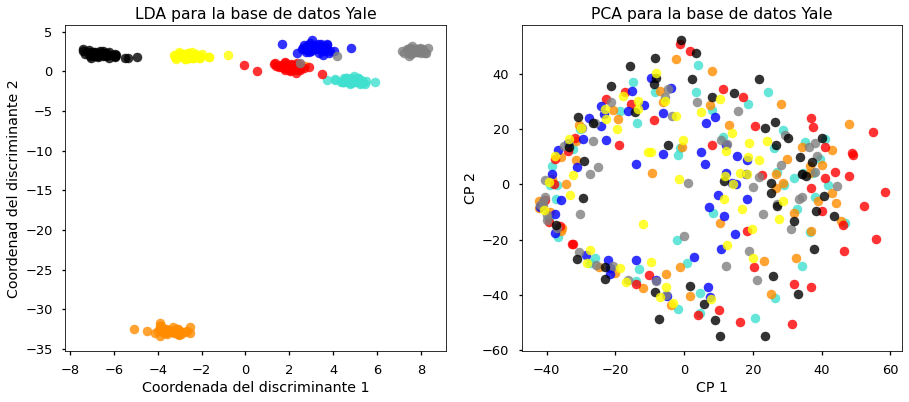

In [ ]:

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
%matplotlib inline

wine = datasets.load_wine()
X = train_data
y = y_train
print(X.shape)
print(y.shape)
target_names = ["Yale_01", "Yale_02", "Yale_03", "Yale_04", "Yale_05", "Yale_06", "Yale_07", "Yale_08"]
print(target_names)
X_r_lda = LinearDiscriminantAnalysis(n_components=2).fit(X, y).transform(X)
X_r_pca = PCA(n_components=2).fit(X).transform(X)

with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1,2,figsize=[15,6])
    colors = ['navy', 'turquoise', 'darkorange', "Red", "blue", "gray", "black", "yellow"]
    for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8], target_names):
        axes[0].scatter(X_r_lda[y == i, 0], X_r_lda[y == i, 1], alpha=.8, label=target_name, color=color)
        axes[1].scatter(X_r_pca[y == i, 0], X_r_pca[y == i, 1], alpha=.8, label=target_name, color=color)
    axes[0].title.set_text('LDA para la base de datos Yale')
    axes[1].title.set_text('PCA para la base de datos Yale')
    axes[0].set_xlabel('Coordenada del discriminante 1')
    axes[0].set_ylabel('Coordenad del discriminante 2')
    axes[1].set_xlabel('CP 1')
    axes[1].set_ylabel('CP 2')